In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
d0=pd.read_csv('./MNIST_Train.csv')

In [115]:
d0['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [116]:
l=d0['label']
d=d0.drop('label', axis=1)

In [117]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


Number: 5


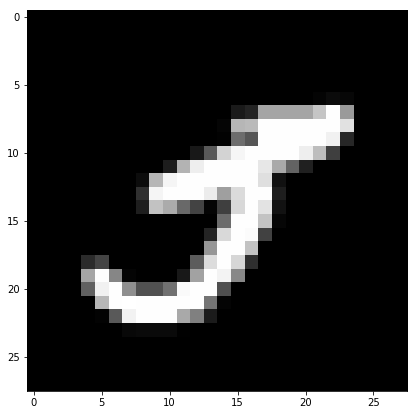

In [118]:
plt.figure(1, figsize=(7,7))
idx=2335

print('Number:',l[idx])

gd=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(gd, interpolation='none', cmap='gray')
plt.show()
plt.close()

In [119]:
labels = l.head(15000)
data = d.head(15000)
print(data.shape)

(15000, 784)


In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
std_data = StandardScaler().fit_transform(data)
print(std_data.shape)

(15000, 784)


In [122]:
samp_data = std_data

cov_mat=np.matmul(samp_data.T, samp_data)
cov_mat=cov_mat/samp_data.shape[0]
print(cov_mat.shape)

(784, 784)


In [123]:
from scipy.linalg import eigh

In [124]:
vals, vects = eigh(cov_mat, eigvals=(782, 783))

In [125]:
print(vects.shape)
vects=vects.T
print(vects.shape)

(784, 2)
(2, 784)


In [126]:
new_coords=np.matmul(vects, samp_data.T)
print(new_coords.shape)

(2, 15000)


In [127]:
new_coords=np.vstack((new_coords, labels)).T

In [129]:
print(new_coords)

[[-5.5586608  -5.04355835  1.        ]
 [ 6.19363477 19.30527806  0.        ]
 [-1.90987794 -7.67877525  1.        ]
 ...
 [-2.14793723 -1.50726893  8.        ]
 [ 3.20412249 -6.53731291  9.        ]
 [-6.87896871 -1.25625388  6.        ]]


In [130]:
df=pd.DataFrame(data=new_coords,\
                columns=('1st_principal','2nd_principal','label'))
print(df.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


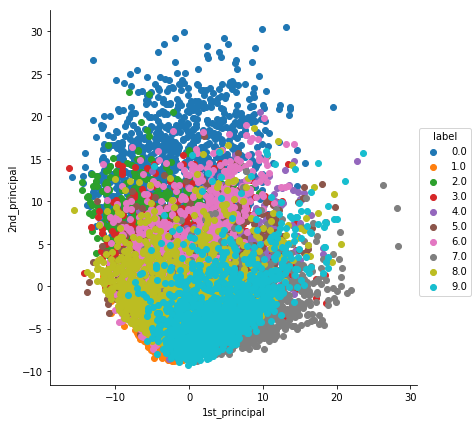

In [131]:
import seaborn as sns
sns.FacetGrid(df, hue='label', size=6)\
.map(plt.scatter, '1st_principal','2nd_principal')\
.add_legend()

plt.show()

In [132]:
from sklearn import decomposition as dc
pca=dc.PCA()

In [133]:
pca.n_components=2
samp_data=d.head(15000)
pca_data=pca.fit_transform(samp_data)
print(pca_data.shape)

(15000, 2)


In [134]:
pca_data = np.vstack((pca_data.T, labels)).T

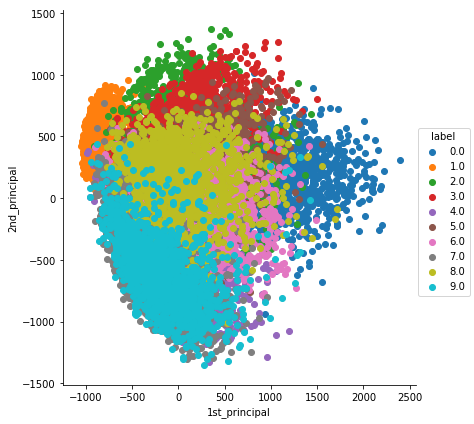

In [135]:
df=pd.DataFrame(data=pca_data,\
                columns=('1st_principal','2nd_principal','label'))

sns.FacetGrid(df, hue='label', size=6)\
.map(plt.scatter, '1st_principal','2nd_principal')\
.add_legend()

plt.show()

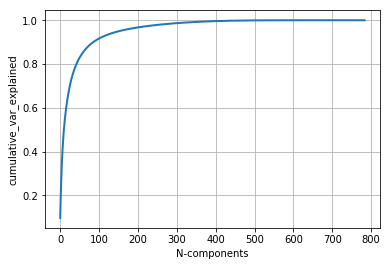

In [136]:
pca.n_components=784
pca_d2=pca.fit_transform(samp_data)

percent_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percent_var_explained)

plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('N-components')
plt.ylabel('cumulative_var_explained')
plt.show()

In [138]:
print(cum_var_explained.shape)

(784,)
